## analysis one

in this analysis, we will analyze correlation between HDI (human development index) and GHG emissions per economic sector (i.e. manufacturing, bunker fuel, etc).

In [3]:
## load libraries

## our old friends...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ...and some new ones
import seaborn as sns


## load CSVs
agriculture=pd.read_csv('agriculture.csv', na_values={'false','False','FALSE'})
energy=pd.read_csv('energy.csv',  na_values={'false','False','FALSE'})
waste=pd.read_csv('waste.csv',   na_values={'false','False','FALSE'})
industrial=pd.read_csv('industrial-processes.csv',  na_values={'false','False','FALSE'})
bunker_fuels=pd.read_csv('bunker-fuels.csv',  na_values={'false','False','FALSE'})

In [4]:
## load HDI data
hdi = pd.read_csv('Human Development Index (HDI)-2.csv', header = 5)
cols = {'Country', '2019'} # subset to just keep 2019 hdis
hdi = hdi[cols] # keeping only relevant data

hdi['Country'] = hdi['Country'].str.strip(' ')

hdi = hdi.rename(columns={'Country': 'country', '2019': 'hdi'})

In [5]:
hdi.head()

,country,hdi
0,Afghanistan,0.511
1,Albania,0.795
2,Algeria,0.748
3,Andorra,0.868
4,Angola,0.581


In [6]:
agriculture = agriculture.sort_values('Country/Region')
energy = energy.sort_values('Country/Region')
waste = waste.sort_values('Country/Region')
industrial = industrial.sort_values('Country/Region')
bunker_fuels = bunker_fuels.sort_values('Country/Region')

ag_ghgchange = (agriculture['2018']-agriculture['2008'])
energy_ghgchange = (energy['2018']-energy['2008'])
waste_ghgchange = (waste['2018']-waste['2008'])
industrial_ghgchange = (industrial['2008']-industrial['1998'])
bunker_ghgchange = (bunker_fuels['2008']-bunker_fuels['1998'])

In [7]:
data_ghgchange = {'country': agriculture['Country/Region'].str.strip(' '), 'agriculture': ag_ghgchange, 'energy': energy_ghgchange,
                  'waste': waste_ghgchange, 'industrial': industrial_ghgchange, 'bunker fuels': bunker_ghgchange}
df_ghgchange = pd.DataFrame.from_dict(data_ghgchange, orient = 'index')
df_ghgchange = df_ghgchange.transpose()

df_ghgchange

,country,agriculture,energy,waste,industrial,bunker fuels
57,Afghanistan,67.42,-4.08,-0.8,0.54,-1.3
145,Albania,2.17,0.68,0.95,0.05,-0.03
38,Algeria,58.44,-17.34,-0.39,5.61,0.56
177,Andorra,-0.05,0.15,0.08,0,0
47,Angola,1.2,64.3,-2.18,1.13,1.59
...,...,...,...,...,...,...
29,Venezuela,-67.4,44.14,0.62,6.66,1.41
23,Vietnam,126.44,126.77,1.21,3.64,-0.78
122,Yemen,-11.3,4.3,0.34,0.22,-0.03
59,Zambia,27.67,-5.72,0.52,0.89,0.63


<AxesSubplot:xlabel='hdi', ylabel='agriculture'>

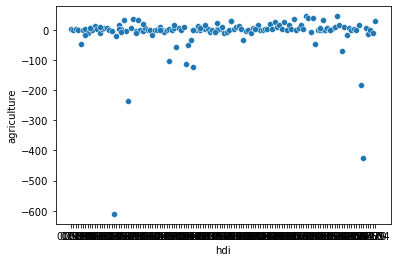

In [8]:
analysis_one = hdi.merge(df_ghgchange, on = 'country')

analysis_one = analysis_one[analysis_one['agriculture'] < 50]

sns.scatterplot(data = analysis_one, x = "hdi", y = "agriculture")

Dear Diane and Jon,
    We are stealing your data frame. We renamed it as a new variable so we can use it later before you drop the country 

In [9]:
# second_analysis_one=analysis_one
analysis_one = analysis_one.drop(['country'], axis = 1)
analysis_one = analysis_one.astype(float)

In [10]:
analysis_one.corr(method = 'spearman')

,hdi,agriculture,energy,waste,industrial,bunker fuels
hdi,1.000000,-0.312070,0.135556,0.030513,0.067183,-0.027572
agriculture,-0.312070,1.000000,-0.070286,0.030426,0.133120,-0.002558
energy,0.135556,-0.070286,1.000000,0.092365,0.248048,0.194022
waste,0.030513,0.030426,0.092365,1.000000,0.084119,0.009608
industrial,0.067183,0.133120,0.248048,0.084119,1.000000,0.318410
bunker fuels,-0.027572,-0.002558,0.194022,0.009608,0.318410,1.000000


In [11]:
analysis_one.hdi.dtype

dtype('float64')

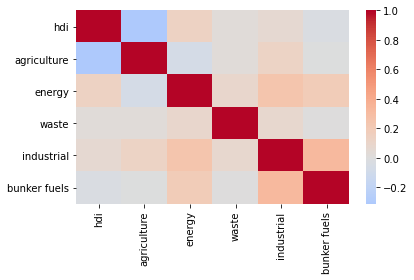

In [12]:
sns.heatmap(analysis_one.corr(method = 'spearman'), center=0, cmap='coolwarm')
plt.tight_layout()
plt.show()

# Analysis Two

In [13]:
industry_data=pd.read_csv('CIA_industry_data.csv')
industry_data=industry_data.rename(columns={'Country/Region': 'country'})
industry_data=industry_data.drop(columns='Jute')
industry_data.dtypes

country      object
Cotton      float64
Clothing    float64
Garments    float64
Textiles    float64
dtype: object

In [14]:
industry_data.head()

,country,Cotton,Clothing,Garments,Textiles
0,Afghanistan,NaN,NaN,NaN,2.0
1,Albania,NaN,2.0,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN
3,Andorra,NaN,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,5.0


In [15]:
analysis_two=hdi.merge(industry_data, how='left', on='country')
# analysis_two = analysis_two.drop(['country'], axis = 1)

In [16]:
analysis_two[analysis_two.hdi.str.find('..')==0]

,country,hdi,Cotton,Clothing,Garments,Textiles
189,Human Development,..,NaN,NaN,NaN,NaN
195,Regions,..,NaN,NaN,NaN,NaN


In [17]:
analysis_two=analysis_two.drop([189,195])
analysis_two.hdi=analysis_two.hdi.astype(float)

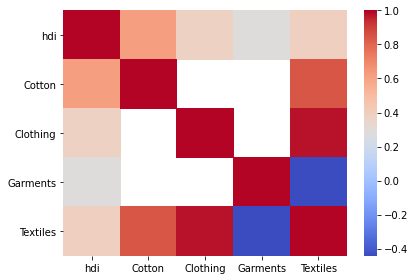

In [18]:
sns.heatmap(analysis_two.corr(), cmap='coolwarm')
plt.tight_layout()
plt.show()

In [19]:
analysis_two.corr(method='pearson')

,hdi,Cotton,Clothing,Garments,Textiles
hdi,1.000000,0.618061,0.379034,0.289884,0.394550
Cotton,0.618061,1.000000,NaN,NaN,0.847122
Clothing,0.379034,NaN,1.000000,NaN,0.978453
Garments,0.289884,NaN,NaN,1.000000,-0.441726
Textiles,0.394550,0.847122,0.978453,-0.441726,1.000000


In [20]:
analysis_two.hdi.dtype

dtype('float64')

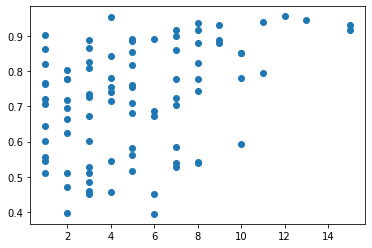

In [21]:
plt.scatter(analysis_two.Textiles, analysis_two.hdi)

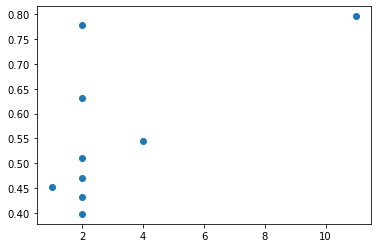

In [22]:
plt.scatter(analysis_two.Cotton, analysis_two.hdi)

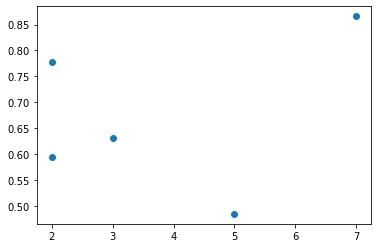

In [23]:
plt.scatter(analysis_two.Garments, analysis_two.hdi)

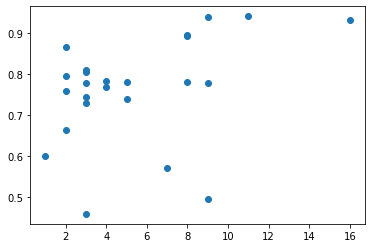

In [24]:
plt.scatter(analysis_two.Clothing, analysis_two.hdi)

Here I'm merging the analysis_one dataframe that contains GHG emissions per sector ('countries','agriculture','energy','waste','industrial','bunker fuels') with the analysis_two df that contains the list of countries and their corresponding hdi and indexes regarding cotton, clothing, garments, and textiles.

In [25]:
analysis_two

,country,hdi,Cotton,Clothing,Garments,Textiles
0,Afghanistan,0.511,NaN,NaN,NaN,2.0
1,Albania,0.795,NaN,2.0,NaN,NaN
2,Algeria,0.748,NaN,NaN,NaN,NaN
3,Andorra,0.868,NaN,NaN,NaN,NaN
4,Angola,0.581,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...
202,Least Developed Countries,0.538,NaN,NaN,NaN,NaN
203,Small Island Developing States,0.728,NaN,NaN,NaN,NaN
204,Organization for Economic Co-operation and Dev...,0.900,NaN,NaN,NaN,NaN
205,World,0.737,NaN,NaN,NaN,NaN


In [26]:
analysis_two_all = df_ghgchange.merge(analysis_two, how='left', on='country')
analysis_two_all

,country,agriculture,energy,waste,industrial,bunker fuels,hdi,Cotton,Clothing,Garments,Textiles
0,Afghanistan,67.42,-4.08,-0.8,0.54,-1.3,0.511,NaN,NaN,NaN,2.0
1,Albania,2.17,0.68,0.95,0.05,-0.03,0.795,NaN,2.0,NaN,NaN
2,Algeria,58.44,-17.34,-0.39,5.61,0.56,0.748,NaN,NaN,NaN,NaN
3,Andorra,-0.05,0.15,0.08,0,0,0.868,NaN,NaN,NaN,NaN
4,Angola,1.2,64.3,-2.18,1.13,1.59,0.581,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,-67.4,44.14,0.62,6.66,1.41,NaN,NaN,NaN,NaN,NaN
191,Vietnam,126.44,126.77,1.21,3.64,-0.78,NaN,NaN,NaN,NaN,NaN
192,Yemen,-11.3,4.3,0.34,0.22,-0.03,0.470,2.0,NaN,NaN,2.0
193,Zambia,27.67,-5.72,0.52,0.89,0.63,0.584,NaN,NaN,NaN,7.0


1) Create a scatterplot for each sector compared against the GHG emissions. 
2) Cluster the data.
3) Make histogram of each cluster of HDI (assuming the clusters relate to HDI.
4) determine if there is a correlation between each cluster and a country's stage of developement.

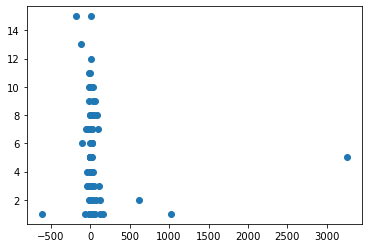

In [27]:
x = ['agriculture','energy','waste','industrial','bunker fuels']
plt.scatter(analysis_two_all['agriculture'], analysis_two_all['Textiles'])
plt.show()

In [29]:
list=['agriculture','energy','waste','industrial','bunker fuels']

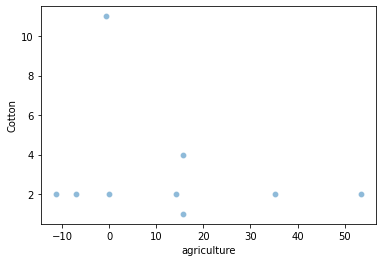

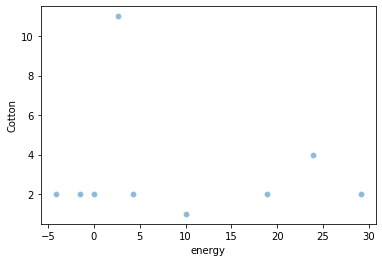

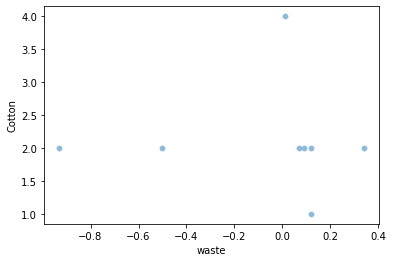

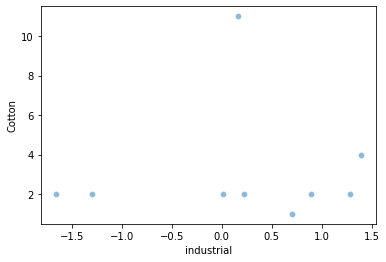

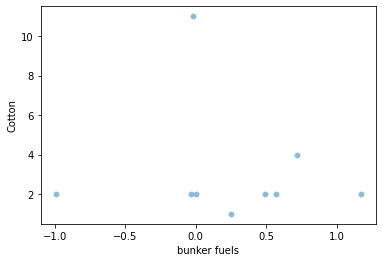

In [30]:
for i in range(len(list)):
    sns.scatterplot(data = analysis_two_all, x = list[i], y = 'Cotton', alpha = 0.5)
    plt.show()

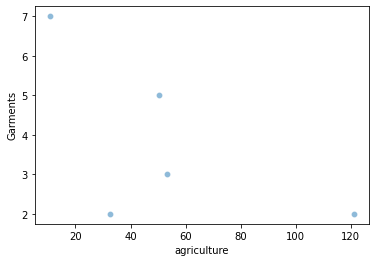

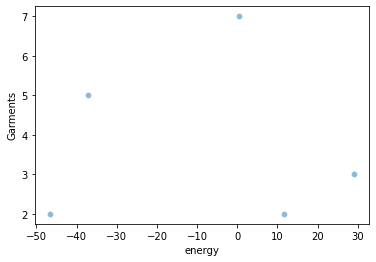

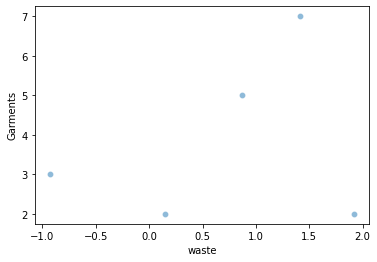

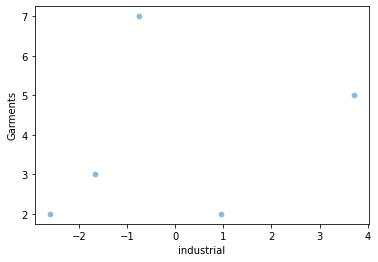

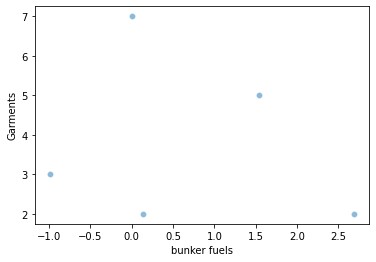

In [31]:
for i in range(len(list)):
    sns.scatterplot(data = analysis_two_all, x = list[i], y = 'Garments', alpha = 0.5)
    plt.show()